# Regression with scikit-learn




In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

from sklearn import linear_model



1. Instantiate a new LinearRegression model
2. set some fake data
3. fit the model
4. results

In [4]:
clf = linear_model.LinearRegression()

X = [[0, 0], [1, 3], [2, 6]]

# true outcomes
y = [0, 3, 6]

clf.fit(X, y)
print('---- \nModel is:')
print(clf)
print("---- \nWeights are: %s "% clf.coef_ )


---- 
Model is:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
---- 
Weights are: [ 0.3  0.9] 


In [5]:
# estimated outcome
clf.coef_

y_hat = np.array(X).dot(clf.coef_)

print("Predicted outcomes")
print(y_hat)


Predicted outcomes
[ 0.  3.  6.]


# Less ideal example

Both predictors and outcomes follow a linear progression (np.linspace)
* Noise is added to the predictors (Uniform over [0,1])
* And to the outcomes (Normal distribution )

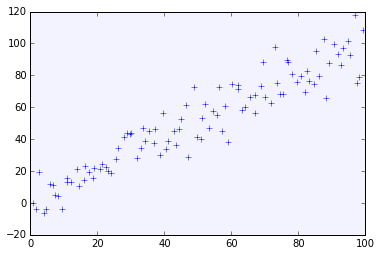

In [16]:
np.random.seed(88)
n = 100
idx = np.linspace(0,n-1,n)
X = pd.DataFrame( {'idx': np.linspace(0,n-1,n), 'x': np.linspace(0,n-1,n) + np.random.random(n) } )

y = np.linspace(3,n + 2,n) + np.random.normal(0,n/10,n)

plt.plot(X.x, y,'+')

In [22]:
clf = linear_model.LinearRegression()
clf.fit(X,y)
clf.coef_


array([-4.4853672 ,  5.46194195])

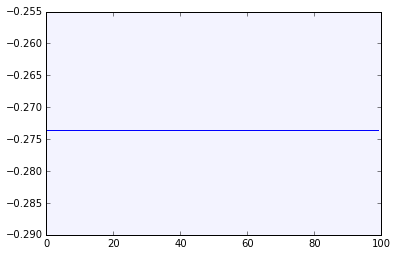

In [23]:
# 2 ways same result

# Algebric
y_hat1 = np.array(X).dot(clf.coef_)

# Scikit predict
y_hat2 = clf.predict(X)


plt.plot(y_hat1  - y_hat2)


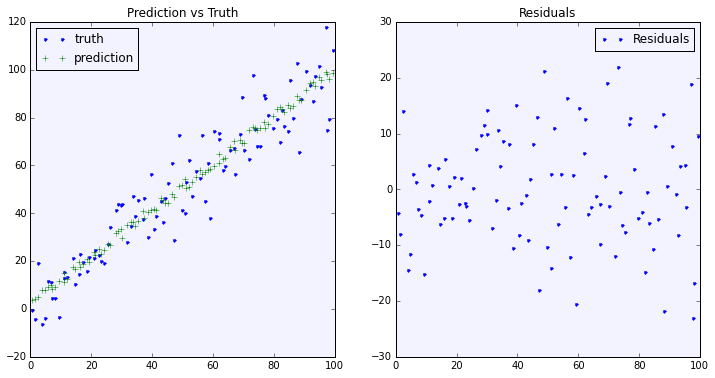

In [21]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(12,6))

# True outcomes in blue
ax1.plot(X.x, y,'.', c='b', label='truth')
# Predicted values in red
ax1.plot(X.x, y_hat,'+', c='r', label='prediction')

ax1.set_title("Prediction vs Truth")
ax1.legend(loc='best')

ax2.plot(X.x,y-y_hat,'.', c='b', label='Residuals')
ax2.set_title("Residuals")
ax2.legend(loc='best')


# Test the residuals 

The residuals should be normaly distributed 
To test that we plot a [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot).

A QQ plot compares the distribution of 2 distribution.
Using the stats.probplot method from scipy, you can compare the distribution of any samples with some predefined distribution, by default a Normal Distribution. 


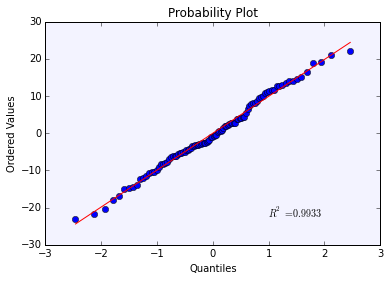

In [230]:
import pylab 
import scipy.stats as stats

(a, r) = stats.probplot(y-y_hat, dist="norm", plot=pylab)
pylab.show()
# Pretty good pretty good


# Your turn

* Load the ozone dataset, drop rows with missing values

* With scikit learn
    * train a first linear regression model Ozone ~ Temp

    Trick: 
            X = df[['Temp']].values 
            y = df.Ozone
    
    * plot the estimated and the true outcomes
    * plot the regression 
    * is that a valid regression?

* Then
    * Train another model with Ozone ~ Wind
    
What do you observe?    


In [231]:
df = pd.read_csv('../../datasets/ozone.csv')
df = df.dropna()

(111, 6)

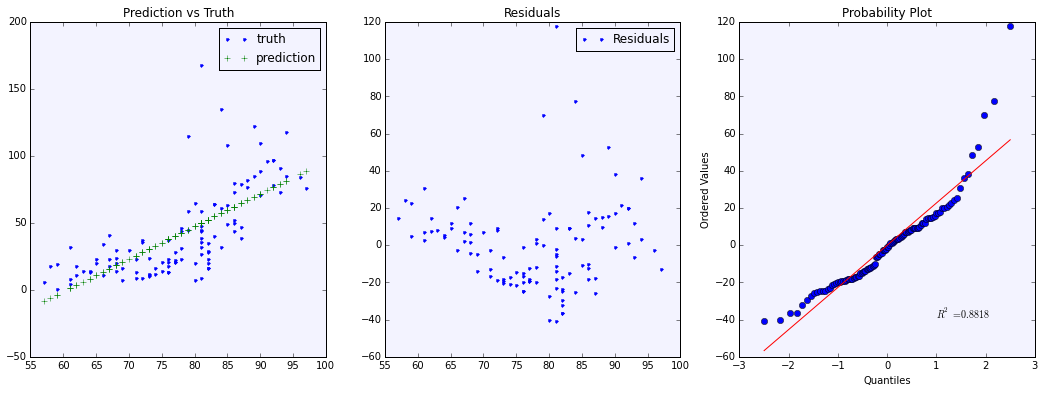

Solution: [linear_regression_with_scikit_lean_solution.py](linear_regression_with_scikit_lean_solution.py)

In [235]:
# pvalues
from sklearn import feature_selection, linear_model
pvals = feature_selection.f_regression(X, y)[1]
pvals

array([  1.55267723e-17])

In [236]:
feature_selection.f_regression(X, y)

(array([ 103.87403621]), array([  1.55267723e-17]))